# web scraping - wuzzuf project

## the objective of this project to explore the jobs posting related to Data Analysis on wuzzuf website. 
- (https://wuzzuf.net/search/jobs/?a=navbl%7Cspbl&q=Data%20Analysis)
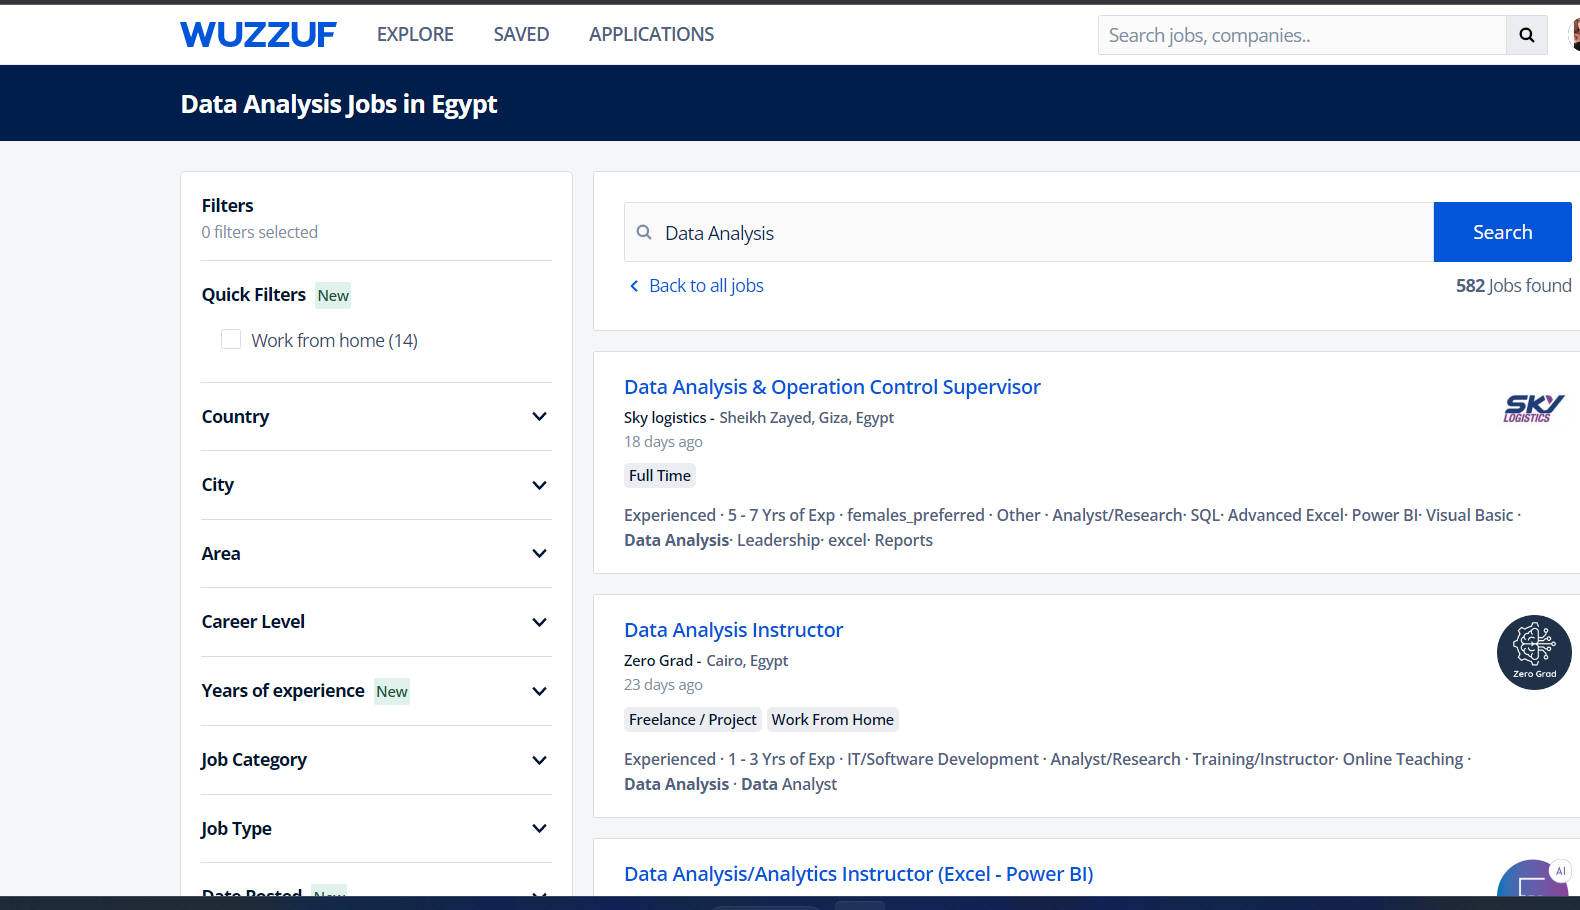

In [1]:
# importing libraries and modules
from bs4 import BeautifulSoup as bs         # for pulling data from any web page
import requests                             # this module in python allow us to send HTTP requests
import pandas as pd

In [2]:
# we use requests to fetch the url

url=requests.get("https://wuzzuf.net/search/jobs/?a=navbl%7Cspbl&q=Data%20Analysis")

In [3]:
# web page content

web_content=url.content

In [4]:
# create lxml parser using beautiful soup to parse the content

soup= bs(web_content,"lxml")

In [5]:
# extracting all the information i need from the web page using the start tag with it's attribute

jobs_posting= soup.find_all("div",{"class":"css-1gatmva e1v1l3u10"})

In [6]:
# check the numbers of jobs posting

len(jobs_posting)

15

In [7]:
# check the first job title in the first job posting

job_title= jobs_posting[0].find_all("h2",{"class":"css-m604qf"})    
job_title[0].text

'Data Analysis & Operation Control Supervisor'

In [8]:
# check the first company name in the first job posting

company_name= jobs_posting[0].find_all("a",{"class":"css-17s97q8"})
company_name[0].text

'Sky logistics -'

In [9]:
# check the first job type in the first job posting

job_type= jobs_posting[0].find_all("div",{"class":"css-1lh32fc"})
job_type[0].text

'Full Time'

In [10]:
# check the job skills in the first job posting

job_skills=jobs_posting[0].find_all("a",{"class":"css-o171kl"})
job_skills[0].text

'Data Analysis & Operation Control Supervisor'

In [11]:
# check the job posted in the first job posting

job_posted= jobs_posting[0].find_all("div",{"class":"css-do6t5g"})
job_posted[0].text                                          

'22 days ago'

In [12]:
# check the job location in the first job posting

job_location=jobs_posting[0].find_all("span",{"class":"css-5wys0k"})
job_location[0].text

'Sheikh Zayed, Giza, Egypt '

In [13]:
# create csv file
file= open("web-scraping-wuzzuf.csv","w")
header="job.title,company.name,job.type,job.skills,job.posted,company.location,city,country\n"
file.write(header)

84

In [14]:
# create for loop to loop over jobs posting

for job_posting in jobs_posting:
    
    job_title=job_posting.find_all("h2",{"class":"css-m604qf"})    
    jtitle= job_title[0].text.strip()
    
    company_name= job_posting.find_all("a",{"class":"css-17s97q8"})
    cname= company_name[0].text.strip()
    
    job_type= job_posting.find_all("div",{"class":"css-1lh32fc"})
    jtype=job_type[0].text.strip()
    
    
    job_skills= job_posting.find_all("a",class_=["css-o171kl","css-5x9pm1"])          # the job skills has 2 classes
    jskills=job_skills[1].text.strip()
    
    job_posted= job_posting.find_all("div", class_=["css-do6t5g","css-4c4ojb"])       # the job posted has 2 classes
    jposted=job_posted[0].text.strip()
    
    job_location= job_posting.find_all("span",{"class":"css-5wys0k"})
    jlocation=job_location[0].text.strip()
    

    
  # I want them to be written in the file in this shape   
    
    file.write(jtitle + "," + cname + "," + jtype +","+ jskills + "," + jposted+ ","+jlocation+"\n")
file.close()
    

In [15]:
# checking

print(jtitle+ "," +cname  + "," +jtype + "," +jskills + "," +jposted + "," +jlocation+"\n")

Senior Data Management Engineer,Ejada  -,Full Time,Experienced,4 days ago,Cairo, Egypt



In [16]:
wuzzuf_data=pd.read_csv("web-scraping-wuzzuf.csv")
wuzzuf_data

,job.title,company.name,job.type,job.skills,job.posted,company.location,city,country
0,Data Analysis & Operation Control Supervisor,Sky logistics -,Full Time,Experienced,22 days ago,Sheikh Zayed,Giza,Egypt
1,Data Analysis Instructor,Zero Grad -,Freelance / ProjectWork From Home,Experienced,27 days ago,Cairo,Egypt,NaN
2,Data Analysis/Analytics Instructor (Excel - Po...,EpsilonAI -,Full TimePart TimeFreelance / Project,Entry Level,1 month ago,Nasr City,Cairo,Egypt
3,Data Analyst,Safa International Travel -,Full Time,Experienced,5 days ago,Dokki,Giza,Egypt
4,Data Analyst,ITCan -,Full Time,Experienced,4 days ago,New Cairo,Cairo,Egypt
5,Data Analyst,London International Patient Services -,Full Time,Entry Level,4 days ago,Sheraton,Cairo,Egypt
6,Senior Data Analyst,Fawry for Banking Technology and Electronic Pa...,Full Time,Experienced,11 days ago,Smart Village,Giza,Egypt
7,Digital Data Reviewer,Arabian Systems -,Full Time,Entry Level,13 days ago,New Cairo,Cairo,Egypt
8,Data Analyst,Othaim -,Full Time,Experienced,13 days ago,Katameya,Cairo,Egypt
9,Data Analyst,Al Ahly capital holding - Al Ahly Tamkeen -,Full Time,Experienced,25 days ago,Zamalek,Cairo,Egypt


In [17]:
# replacing the null values in country column with not specefied

wuzzuf_data.fillna("Not Specefied", inplace=True)
wuzzuf_data

,job.title,company.name,job.type,job.skills,job.posted,company.location,city,country
0,Data Analysis & Operation Control Supervisor,Sky logistics -,Full Time,Experienced,22 days ago,Sheikh Zayed,Giza,Egypt
1,Data Analysis Instructor,Zero Grad -,Freelance / ProjectWork From Home,Experienced,27 days ago,Cairo,Egypt,Not Specefied
2,Data Analysis/Analytics Instructor (Excel - Po...,EpsilonAI -,Full TimePart TimeFreelance / Project,Entry Level,1 month ago,Nasr City,Cairo,Egypt
3,Data Analyst,Safa International Travel -,Full Time,Experienced,5 days ago,Dokki,Giza,Egypt
4,Data Analyst,ITCan -,Full Time,Experienced,4 days ago,New Cairo,Cairo,Egypt
5,Data Analyst,London International Patient Services -,Full Time,Entry Level,4 days ago,Sheraton,Cairo,Egypt
6,Senior Data Analyst,Fawry for Banking Technology and Electronic Pa...,Full Time,Experienced,11 days ago,Smart Village,Giza,Egypt
7,Digital Data Reviewer,Arabian Systems -,Full Time,Entry Level,13 days ago,New Cairo,Cairo,Egypt
8,Data Analyst,Othaim -,Full Time,Experienced,13 days ago,Katameya,Cairo,Egypt
9,Data Analyst,Al Ahly capital holding - Al Ahly Tamkeen -,Full Time,Experienced,25 days ago,Zamalek,Cairo,Egypt


In [18]:
# save file

wuzzuf_data.to_csv("web-scraping-wuzzuf.csv", index=False)